## Import relevant packages

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Import Dataset as a dataframe

In [166]:
 data = pd.read_csv("C:/Users/mdara/Jupyter/Untitled Folder/Stout Projects/Case Study 2/casestudy.csv")

## Quick Overview of the data

In [167]:
data.info()
data.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685927 entries, 0 to 685926
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      685927 non-null  int64  
 1   customer_email  685927 non-null  object 
 2   net_revenue     685927 non-null  float64
 3   year            685927 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 20.9+ MB


,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015
5,5,mobvusnzfr@gmail.com,39.44,2015
6,6,kxwkqvacsv@gmail.com,171.46,2015
7,7,iqmnugdcjs@gmail.com,111.99,2015
8,8,baiikostmd@gmail.com,170.70,2015
9,9,lfeafnigbu@gmail.com,54.99,2015


## Total revenue for the current year (Current = 2017)

In [168]:
rev_table = data[['net_revenue', 'year']]
rev_table2 = rev_table.groupby('year').sum().sort_values('net_revenue')

rev_table2

,net_revenue
year,
2016,25730943.59
2015,29036749.19
2017,31417495.03


The total revenue for the current year is $31,417,495.03

## New Customer Revenue

In [169]:
ncr = data.copy()
ncr = ncr.assign(New = np.where(~ncr['customer_email'].duplicated(), 'New', 'Existing'))

new_customers = ncr[(ncr['year'] == 2017) & (ncr['New'] == 'New')]
print('New customer revenue for 2017 was:', str(new_customers['net_revenue'].sum()))
ncr.head(5)

New customer revenue for 2017 was: 28676607.64


,Unnamed: 0,customer_email,net_revenue,year,New
0,0,nhknapwsbx@gmail.com,249.92,2015,New
1,1,joiuzbvcpn@gmail.com,87.61,2015,New
2,2,ukkjctepxt@gmail.com,168.38,2015,New
3,3,gykatilzrt@gmail.com,62.40,2015,New
4,4,mmsgsrtxah@gmail.com,43.08,2015,New


#### Existing Customer Growth (Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year)

In [171]:
rev_ex_17 = ncr[(ncr['year'] == 2017) & (ncr['New'] == "Existing")].net_revenue.sum()
rev_ex_16 = ncr[(ncr['year'] == 2016) & (ncr['New'] == 'Existing')].net_revenue.sum()
print('Existing customer growth(minus means shrinkage): ',rev_ex_17-rev_ex_16)

Existing customer growth(minus means shrinkage):  -4744565.19


## Revenue lost from attrition

In [172]:
rev_16 = ncr[ncr['year'] == 2016].net_revenue.sum() 
rev_ex_17 - rev_16

print("Revenue lost from attrition for year 2017 is: ", -(rev_ex_17 - rev_16))

Revenue lost from attrition for year 2017 is:  22990056.2


### Existing Customer Revenue Current Year

In [173]:
print('Existing Customer Revenue Current Year:',rev_ex_17)

Existing Customer Revenue Current Year: 2740887.3899999997


### Existing Customer Revenue Prior Year

In [174]:
print('Existing Customer Revenue Prior Year',rev_ex_16)

Existing Customer Revenue Prior Year 7485452.58


## Total customers Current Year

In [175]:
print('Total customers Current Year:',ncr[ncr['year'] == 2017]['customer_email'].count())

Total customers Current Year: 249987


### Total Customers Previous Year

In [176]:
print('Total customers previous Year:',ncr[ncr['year'] == 2016]['customer_email'].count())

Total customers previous Year: 204646


### New Customers

In [177]:
new_cust = ncr[(ncr['year'] == 2017)&(ncr['New'] == 'New')]['customer_email'].count()
print("New customers: ",new_cust)

New customers:  228262


### Lost Customers
###### Equation Used: Total customers in '16 - Existing customers in '17

In [178]:
lost_cust = ncr[(ncr['year'] == 2016)]['customer_email'].count()-ncr[(ncr['year']==2017)&(ncr['New']=='Existing')]['customer_email'].count()
print("Lost customers: ",lost_cust)

Lost customers:  182921


# Visualizations

In [179]:
rev_table2 = rev_table2.reset_index()

In [183]:
rev_table2 = rev_table2.sort_values('year', ascending = True)
rev_table2

,year,net_revenue
1,2015,29036749.19
0,2016,25730943.59
2,2017,31417495.03


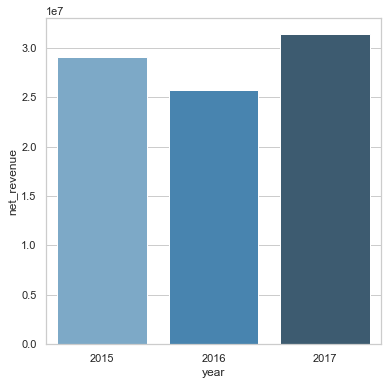

In [184]:
fig_a, ax_a = plt.subplots(figsize = (6,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="year", y="net_revenue", data=rev_table2,
                palette="Blues_d")

Revenue was at 29.03M in 2015, dipped to 25.73M in 2016, then rose to 31.42M in 2017.

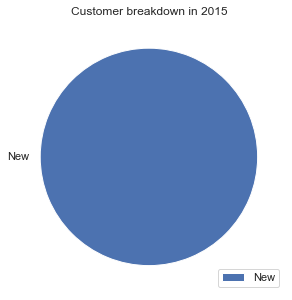

In [185]:
new_15 = 231294
new_16 = 145062
exist_16 = 59584
new_17 = 228262
exist_17 = 21725

fig0, ax0 = plt.subplots(figsize = (5,5))
labels = ['New']
ax0.pie([new_15], labels = labels)
plt.legend(loc='upper left',labels=labels)
ax0.legend(loc="lower right")
plt.title('Customer breakdown in 2015')
plt.show()

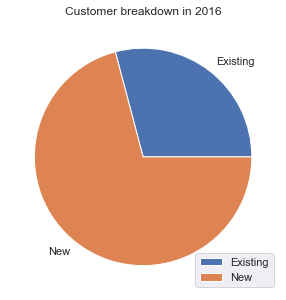

In [153]:
fig1, ax1 = plt.subplots(figsize = (5,5))
labels = ['Existing', 'New']
ax1.pie([exist_16, new_16], labels = labels)
plt.legend(loc='upper left',labels=labels)
ax1.legend(loc="lower right")
plt.title('Customer breakdown in 2016')
plt.show()

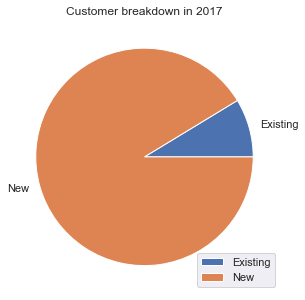

In [154]:
fig2, ax2 = plt.subplots(figsize = (5,5))
labels = ['Existing', 'New']
ax2.pie([exist_17, new_17], labels = labels)
plt.legend(loc='upper left',labels=labels)
ax2.legend(loc="lower right")
plt.title('Customer breakdown in 2017')
plt.show()

From the three pie charts we can clearly see the trend of an steady increase in new customers.